<a href="https://colab.research.google.com/github/MuhTaufikAziz/202155202052-Muh_Taufik_Aziz/blob/main/KLASIFIKASI_KEMATANGAN_BUAH_NAGA_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KLASFIKASI KEMATANGAN BUAH NAGA MENGGUNAKAN ALGORITMA CONVOLUTIONAL NEURAL NETWORK (CNN)
[Referensi](https://dimasrifai.medium.com/klasifikasi-gambar-dengan-convolutional-neural-network-cnn-cce16b514c61)

### Install Library Tambahan

In [ ]:
!pip install split-folders
# !nvidia-smi

### Import Library

In [ ]:
import splitfolders, os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

### Import dataset dari Google Drive

In [ ]:
# Ambil dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Split dataset

Pada tahap ini Dilakukan split dataset menjadi 80% data train dan 20% data validation

In [ ]:
# melakukan ekstraksi pada file zip
# import zipfile,os
# local_zip = '/content/drive/MyDrive/DL/archivenagafruit.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/dataset')
# zip_ref.close()

In [ ]:
# import splitfolders, os

splitfolders.ratio('/content/drive/MyDrive/NAGAFRUITDATASETS',
output='/content/drive/MyDrive/hasilspitdata_naga',
seed=1337,
ratio=(.8, .2))

Copying files: 341 files [01:17,  4.41 files/s]


In [ ]:
base_dir = '/content/drive/MyDrive/hasilspitdata_naga'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

### Preprocessing

Pada tahap ini dilakukan augmentasi gambar dengan ImageDataGenerator pada Keras untuk menghasilkan versi baru pada gambar. Beberapa contoh augmentasi gambar adalah membalik gambar secara horizontal atau vertikal, memutar, memperbesar.

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=0,
zoom_range = 0.2,
shear_range = 0.2,
horizontal_flip = True,
vertical_flip = True,
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode = 'nearest',
validation_split = 0.2)

val_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=0,
zoom_range = 0.2,
shear_range = 0.2,
horizontal_flip = True,
vertical_flip = True,
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode = 'nearest',
validation_split = 0.2)

Sebelum membangun model, kita menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model

In [ ]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=16,
class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=16,
class_mode='categorical')

Found 272 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


### Membuat Model CNN (Convolutional Neural Network)

Setelah data telah siap, kita akan menggunakan model CNN dua dimensi (2D). Dalam projek kali ini kita akan menggunakan 4 lapisan convolutional dan max-pooling.

Convolutional layer digunakan untuk mengekstrak atribut pada gambar sedangkan max-pooling layer akan membantu memperkecil ukuran setiap gambar dari proses convolutional sehingga kecepatan training akan jauh lebih cepat.

Pada model ini kita menggunakan fungsi aktivasi relu (Rectified Linear Unit) dan softmax. Penggunaan ReLU adalah untuk meningkatkan non-linearitas gambar karena gambar secara alami non-linear dan aktivasi Softmax digunakan ketika kasus adalah klasifikasi multi-kelas.

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

Dari model yang telah dibentuk, dilakukan kompilasi pada model dan menentukan loss function, optimizer, and evaluation metrics.

In [ ]:
# from tensorflow.keras.optimizers import Adam

Adam(name='Adam')
model.compile(optimizer = 'Adam',
loss = 'categorical_crossentropy',
metrics = ['accuracy'])

Untuk mempercepat kecepatan pelatihan,digunakan fungsi callback untuk penghentian awal ketika model telah mencapai ambang akurasi. Berhenti lebih awal berguna untuk mengurangi kecenderungan model untuk overfitted.

In [ ]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
  lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
  tb_callback = tf.keras.callbacks.TensorBoard(
  log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
  update_freq='epoch', embeddings_freq=0,
  embeddings_metadata=None)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Melatih Model

Kita akan melatih model dengan menggunakan data pada train dan mengevaluasi model menggunakan data pada validation generator dengan total epoch sebanyak 15 kali sehingga diperoleh akurasi validasi 80%

In [ ]:
batch_size = 16
with tf.device('/device:GPU:0'):
  history = model.fit(
    train_generator,
    epochs =  15,
    steps_per_epoch = 100//batch_size,
    validation_data = validation_generator,
    verbose = 1,
    validation_steps = 50//batch_size,
    )

Epoch 1/15
6/6 [==============================] - 60s 9s/step - loss: 1.1539 - accuracy: 0.4479 - val_loss: 1.0552 - val_accuracy: 0.3333
Epoch 2/15
6/6 [==============================] - 41s 8s/step - loss: 0.9334 - accuracy: 0.5312 - val_loss: 0.7027 - val_accuracy: 0.6458
Epoch 3/15
6/6 [==============================] - 44s 8s/step - loss: 0.5805 - accuracy: 0.6458 - val_loss: 0.4637 - val_accuracy: 0.6667
Epoch 4/15
6/6 [==============================] - 44s 8s/step - loss: 0.5073 - accuracy: 0.6562 - val_loss: 0.6204 - val_accuracy: 0.7292
Epoch 5/15
6/6 [==============================] - 42s 7s/step - loss: 0.8152 - accuracy: 0.6250 - val_loss: 0.4226 - val_accuracy: 0.7500
Epoch 6/15
6/6 [==============================] - 42s 8s/step - loss: 0.5579 - accuracy: 0.7188 - val_loss: 0.4618 - val_accuracy: 0.7708
Epoch 7/15
6/6 [==============================] - 43s 8s/step - loss: 0.4621 - accuracy: 0.7604 - val_loss: 0.4304 - val_accuracy: 0.7917
Epoch 8/15
6/6 [==================

### Grafik Model Akurasi dan Loss

In [ ]:
# import matplotlib.pyplot as plt

# Ambil informasi dari objek history untuk akurasi dan loss
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

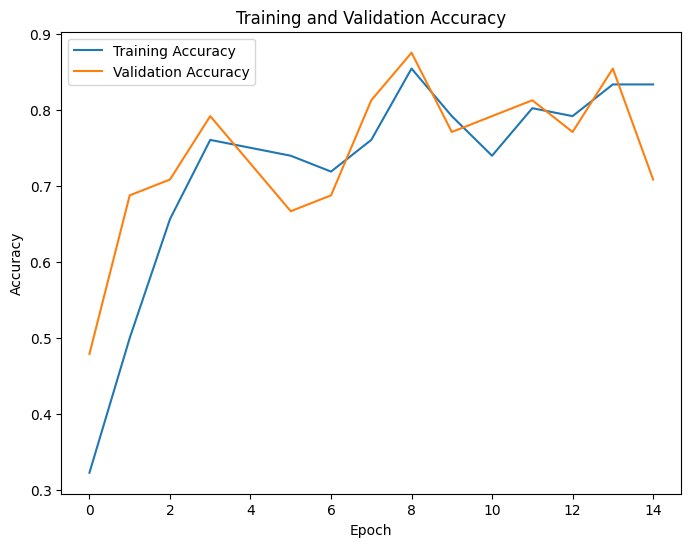

In [ ]:
# Gambar plot akurasi
plt.figure(figsize=(8, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.grid()
plt.show()

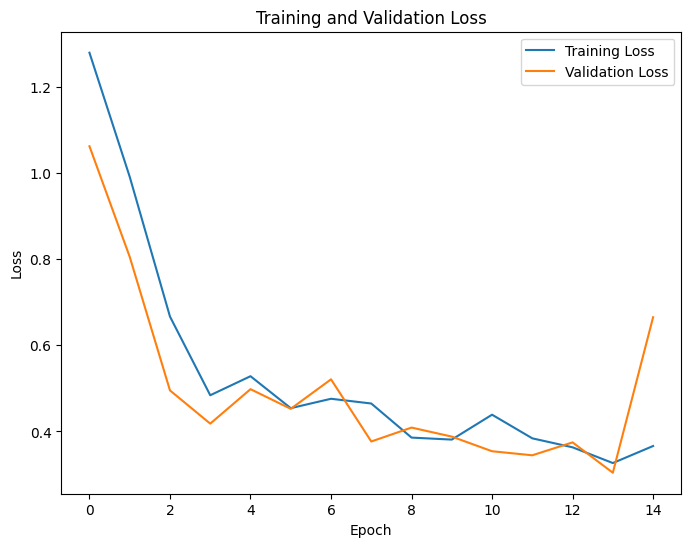

In [ ]:
# Gambar plot loss
plt.figure(figsize=(8, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.grid()
plt.show()

### Uji Prediksi Gambar

Saving BuahMentah_ (6).jpg to BuahMentah_ (6).jpg
1/1 [==============================] - 0s 287ms/step
Kategori Gambar : Mentah


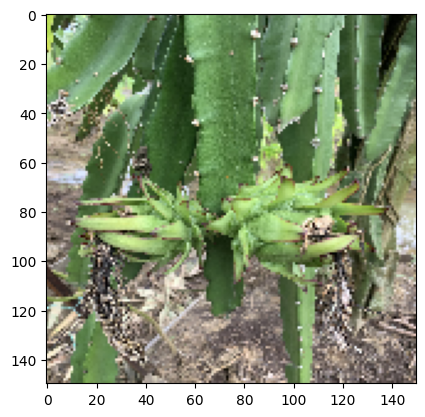

In [ ]:
# import numpy as np
# from google.colab import files
# from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import matplotlib.pyplot as plt
# %matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    if classes[0][0] == 1:
        print('Kategori Gambar : Matang')
    elif classes[0][1] == 1:
        print('Kategori Gambar : Mengkal')
    else:
        print('Kategori Gambar : Mentah')

### Save Model yang telah dibuat

In [ ]:
!nvidia-smi

Thu Jul 20 17:54:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |   1935MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Simpan model dalam format .h5
model.save('Model_buah_naga.h5')

print("Model telah berhasil disimpan.")

Model telah berhasil disimpan.
